### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [627]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [629]:
data = pd.read_csv('data/coupons.csv')

In [630]:
data.head()
data.info()
#data["car"].isnull().sum()
data['maritalStatus'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

2. Investigate the dataset for missing or problematic data.

In [632]:
data.isnull().sum()
data["Bar"].value_counts()
data["CoffeeHouse"].value_counts()
data["CarryAway"].value_counts()
data["RestaurantLessThan20"].value_counts()
#data["Restaurant20To50"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [634]:
################################################################
#Step 1 First evaulate missing data, find ratios
################################################################
row_sums = data.shape[0]
print ("Total Sum of rows: " + str(row_sums))

#Car
null_car_data = data["car"].isnull().sum()
not_null_car_data= data["car"].notnull().sum() 
print ("Not null car data : " + str(not_null_car_data))
print ("Null car data : " + str(null_car_data))
car_ratio_percent = round((null_car_data/row_sums)*100,2)
print("Percent of null car data ratio " + str(car_ratio_percent) + "%") #most of the values for car data are null so we will drop it

#Bar
null_bar_data = data["Bar"].isnull().sum()
bar_ratio_percent = round((null_bar_data/row_sums)*100,2)
print("Percent of null Bar data ratio " + str(bar_ratio_percent) + "%")

#CoffeeHouse
null_coffee_house_data = data["CoffeeHouse"].isnull().sum()
coffee_house_ratio_percent = round((null_coffee_house_data/row_sums)*100,2)
print("Percent of null Coffee House data ratio " + str(coffee_house_ratio_percent) + "%")

#CarryAway
null_carry_away_data = data["CarryAway"].isnull().sum()
carry_away_ratio_percent = round((null_carry_away_data/row_sums)*100,2)
print("Percent of null Carry Away data ratio " + str(carry_away_ratio_percent) + "%")
#RestaurantLessThan20
null_rest_under_twenty_data = data["RestaurantLessThan20"].isnull().sum()
rest_under_twenty_ratio_percent = round((null_rest_under_twenty_data/row_sums)*100,2)
print("Percent of null RestaurantLessThan20 data ratio " + str(rest_under_twenty_ratio_percent) + "%")
#Restaurant20To50
null_rest_over_twenty_data = data["Restaurant20To50"].isnull().sum()
rest_over_twenty_ratio_percent = round((null_rest_over_twenty_data/row_sums)*100,2)
print("Percent of null Restaurant20To50 data ratio " + str(rest_over_twenty_ratio_percent) + "%")
################################################################
#Step 2 Then drop or fill data
################################################################
#drop car data 
#
#data = data.fill_na('bar',"never")
#data = data.fill_na('CoffeeHouse','less1')
#data = data.fill_na('CarryAway', '1~3')
#RestaurantLessThan20, 1~3
#Restaurant20To50,less1
#
# Create a modified copy
cleaned_data = data.copy()

# Drop 'car' column
cleaned_data = cleaned_data.drop('car', axis=1)

# Fill missing values
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = cleaned_data[col].mode()[0]
    print(f"Mode Value for {col}: {mode_value}")
    cleaned_data[col] = cleaned_data[col].fillna(mode_value)



cleaned_data.isnull().sum()

Total Sum of rows: 12684
Not null car data : 108
Null car data : 12576
Percent of null car data ratio 99.15%
Percent of null Bar data ratio 0.84%
Percent of null Coffee House data ratio 1.71%
Percent of null Carry Away data ratio 1.19%
Percent of null RestaurantLessThan20 data ratio 1.02%
Percent of null Restaurant20To50 data ratio 1.49%
Mode Value for Bar: never
Mode Value for CoffeeHouse: less1
Mode Value for CarryAway: 1~3
Mode Value for RestaurantLessThan20: 1~3
Mode Value for Restaurant20To50: less1


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [636]:
ratio = round(cleaned_data['Y'].value_counts()[1]/cleaned_data.shape[0]*100,2)
print (cleaned_data['Y'].value_counts()[1])
print (ratio)
print (cleaned_data['Y'].value_counts())
print (cleaned_data.shape[0])

7210
56.84
Y
1    7210
0    5474
Name: count, dtype: int64
12684


5. Use a bar plot to visualize the `coupon` column.

Hello


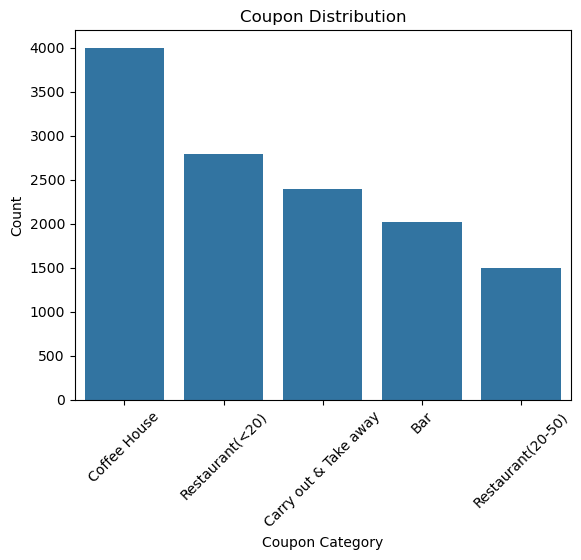

In [638]:
#sns.displot(cleaned_data, x="coupon")
#plt.title('Seaborn Bar Plot Example')
#plt.xlabel('Category')
#plt.ylabel('Value')

ax = sns.countplot(x='coupon', data=cleaned_data, order=data['coupon'].value_counts().index)
ax.tick_params(axis='x', labelrotation=45)
#
# Add title and labels
plt.title('Coupon Distribution')
plt.xlabel('Coupon Category')
plt.ylabel('Count')

## Adjust layout and display the plot
#plt.tight_layout()
#plt.show()
print ("Hello")


6. Use a histogram to visualize the temperature column.

0    55
1    80
2    80
3    80
4    80
Name: temperature, dtype: int64

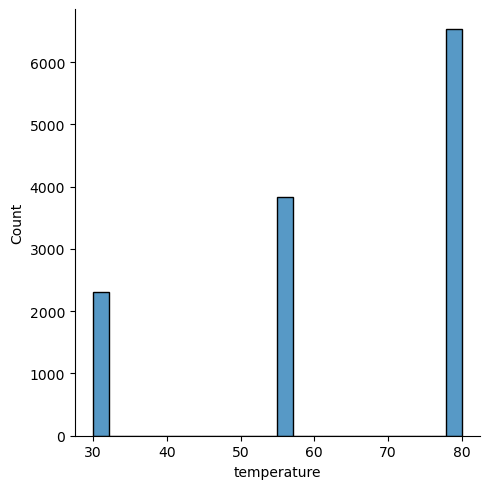

In [640]:
sns.displot(cleaned_data, x="temperature")
cleaned_data["temperature"].head(5)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [712]:
# Filter rows where the coupon is for 'Bar'
total_data_num = cleaned_data.shape[0]
bar_coupons = cleaned_data[cleaned_data['coupon'] == 'Bar']



2. What proportion of bar coupons were accepted?


In [714]:
accepted_bar_coupons = bar_coupons['Y'].value_counts()[1]
bar_coupons_num = bar_coupons.shape[0]
bar_coupons_ratio = round((accepted_bar_coupons/bar_coupons_num)*100,2)
print (bar_coupons_ratio)

41.0


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [716]:
more_than_3_times=cleaned_data[
    ((cleaned_data["Bar"] == '4~8') | (cleaned_data["Bar"]=='gt8')) &
    (cleaned_data['coupon'] == 'Bar')
]
#print(more_than_3_times['Y'].value_counts())

less_than_3_times=cleaned_data[
    ((cleaned_data["Bar"] == '1~3') | (cleaned_data["Bar"]=='never')) &
    (cleaned_data['coupon'] == 'Bar')
]        
#print(less_than_3_times['Y'].value_counts())

total_coupons_over =int(more_than_3_times.shape[0])
total_coupons_under =int(less_than_3_times.shape[0])
total_over_three = int(more_than_3_times["Y"].value_counts()[1])
total_under_three = int(less_than_3_times["Y"].value_counts()[1])


acceptance_rate_over_three = round(total_over_three/total_coupons_over*100,2)
print(f"Acceptance Rate Over 3: {str(acceptance_rate_over_three)}%")
acceptance_rate_under_three = round(total_under_three/total_coupons_under*100,2)
print(f"Acceptance Rate Under 3: {str(acceptance_rate_under_three)}%")

Acceptance Rate Over 3: 76.88%
Acceptance Rate Under 3: 33.73%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [321]:
cleaned_data['age'] = pd.to_numeric(cleaned_data['age'], errors='coerce') #change the age field to an int
bar_once_over_25 = cleaned_data[
    (cleaned_data["Bar"] != 'never') & (cleaned_data['age'] > 25) &
    (cleaned_data['coupon'] == 'Bar')
]

never_bar_once_or_under_25 = cleaned_data[
    ((cleaned_data["Bar"] == 'never') | (cleaned_data['age'] < 25)) &
    (cleaned_data['coupon'] == 'Bar')
]
#never_bar_once_or_under_25 = cleaned_data.drop(bar_once_over_25.index)
#############################
accepted_bar_never = never_bar_once_or_under_25['Y'].value_counts()[1]
accepted_bar_once  = bar_once_over_25['Y'].value_counts()[1]
bar_once_count = (bar_once_over_25.shape[0] )
bar_never_count =  (never_bar_once_or_under_25.shape[0])
total = bar_once_count + bar_never_count

#############################
acceptance_rate_over_25_and_bar = round((accepted_bar_once/bar_once_count)*100,2)
acceptance_rate_everyone_else = round((accepted_bar_never/bar_never_count)*100,2)
print ("Acceptance rate over 25 and go to bars : " + str(acceptance_rate_over_25_and_bar) + "%")
print ("Acceptance rate never bar once and under 25 : " + str(acceptance_rate_everyone_else) + "%")

Acceptance rate over 25 and go to bars : 54.47%
Acceptance rate never bar once and under 25 : 30.4%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [339]:
# Function to calculate acceptance rate
def calculate_acceptance_rate(df, label_column='Y', accepted_value=1):
    total = df.shape[0]
    accepted = df[label_column].value_counts().get(accepted_value, 0)
    return round((accepted / total) * 100, 2) if total > 0 else 0



cleaned_data.rename(columns={'passanger': 'passenger'}, inplace=True)
no_kids = cleaned_data[
    (cleaned_data['coupon'] == 'Bar') &
    (cleaned_data["Bar"] != 'never') & 
    (~cleaned_data['passenger'].isin(["kid", "kids"])) &
    (~cleaned_data['occupation'].isin(["farming","fishing","forestry"]))
]
#no_kids_total = no_kids.shape[0]
everyone_else = cleaned_data.drop(no_kids.index)
everyone_else = everyone_else[everyone_else["coupon"]=="Bar"]

# Calculate acceptance rates
acceptance_rate_no_kids = calculate_acceptance_rate(no_kids)
acceptance_rate_everyone_else = calculate_acceptance_rate(everyone_else)

# Print results
print(f"Acceptance Rate No Kids       : {acceptance_rate_no_kids}%")
print(f"Acceptance Rate Everyone Else : {acceptance_rate_everyone_else}%")

Acceptance Rate No Kids       : 56.86%
Acceptance Rate Everyone Else : 19.27%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [349]:
not_widowed= cleaned_data[
    (cleaned_data["maritalStatus"] != 'widowed') & 
    (~cleaned_data['passenger'].isin(["kid", "kids"])) &
    (cleaned_data["Bar"] != 'never') &
    (cleaned_data['coupon'] == 'Bar')
]
everyone_else_nw = cleaned_data.drop(not_widowed.index)
everyone_else_nw = everyone_else_nw[ everyone_else_nw["coupon"]=="Bar"]

acceptance_rate_not_widowed = calculate_acceptance_rate(not_widowed)
acceptance_rate_everyone_else_nw = calculate_acceptance_rate(everyone_else_nw)
print(f"Acceptance Rate Not Widowed : {acceptance_rate_not_widowed}%")
print(f"Acceptance Rate Everyone Else : {acceptance_rate_everyone_else_nw}%")

under_30=cleaned_data[
    (cleaned_data['age'] > 30) &
    (cleaned_data["Bar"] != 'never') &
    (cleaned_data['coupon'] == 'Bar')
]
everyone_else_30 = cleaned_data.drop(under_30.index)
everyone_else_30 = everyone_else_30[everyone_else_30["coupon"]=="Bar"]

acceptance_rate_under_30 = calculate_acceptance_rate(under_30)
acceptance_rate_everyone_else_30 = calculate_acceptance_rate(everyone_else_30)

print(f"Acceptance Rate Under 30 : {acceptance_rate_under_30}%")
print(f"Acceptance Rate Everyone Else : {acceptance_rate_everyone_else_30}%")

income_ranges = ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999"]
cheap_restaurants_freq = ['4~8','gt8']
# Filter the DataFrame using isin()
cheap_restaurants= cleaned_data[
    (cleaned_data['RestaurantLessThan20'].isin(cheap_restaurants_freq)) & 
    (cleaned_data['income'].isin(income_ranges)) &
    (cleaned_data['coupon'] == 'Bar')
]
everyone_else_cr = cleaned_data.drop(cheap_restaurants.index)
everyone_else_cr = everyone_else_cr[everyone_else_cr["coupon"]=="Bar"]

acceptance_rate_cheap_restaurants_freq = calculate_acceptance_rate(cheap_restaurants)
acceptance_rate_everyone_else_rf = calculate_acceptance_rate(everyone_else_cr)

print(f"Acceptance Rate Cheap Restaurants : {acceptance_rate_cheap_restaurants_freq}%")
print(f"Acceptance Rate Everyone Else : {acceptance_rate_everyone_else_rf}%")


Acceptance Rate Not Widowed : 56.86%
Acceptance Rate Everyone Else : 19.27%
Acceptance Rate Under 30 : 48.29%
Acceptance Rate Everyone Else : 38.62%
Acceptance Rate Cheap Restaurants : 45.76%
Acceptance Rate Everyone Else : 40.26%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The more often people go to bars the more like they are to accept the coupons.   
Most people who accepted the coupon went to bars 1~3 times.
People who do not have kids in the car are more likely to accept coupons to bars.
Younger people are slightly more likely to accept the bar coupon.  
People who like to go to cheap restaurants are more likely to accept the coupon.

It seems like people with kids are less like to go to bars so they might not accept the coupon as often.
One could conclude that people who like cheap restaurants like to find deals and are interested in coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Index(['1~3', '4~8', 'less1', 'gt8', 'never'], dtype='object', name='RestaurantLessThan20')


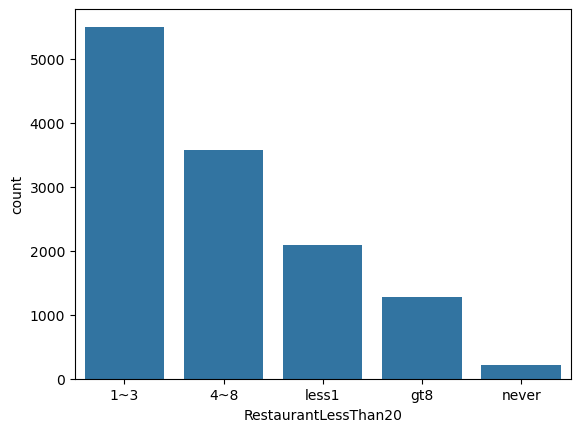

In [656]:
#Restaurants under $20


restaurants_under_20 = cleaned_data["RestaurantLessThan20"].value_counts().index
print (restaurants_under_20)

ax = sns.countplot(x='RestaurantLessThan20', data=cleaned_data, order=restaurants_under_20)

In [657]:
cheap_restaurants_freq = ['4~8','gt8']
gender_male = cleaned_data[
#    (cleaned_data['coupon'] == 'RestaurantLessThan20') &
    (cleaned_data['RestaurantLessThan20'].isin(cheap_restaurants_freq))
    & (cleaned_data["gender"]=="Male")
]
gender_female = cleaned_data[
#    (cleaned_data['coupon'] == 'RestaurantLessThan20') &
    (cleaned_data['RestaurantLessThan20'].isin(cheap_restaurants_freq))
    & (cleaned_data["gender"]=="Female")
]

cleaned_data["gender"].value_counts()
everyone_else_nm = cleaned_data.drop(gender_male.index)
everyone_else_nf = cleaned_data.drop(gender_female.index)

acceptance_rate_cheap_restaurants_male = calculate_acceptance_rate(gender_male)
acceptance_rate_everyone_else_nm = calculate_acceptance_rate(everyone_else_nm)
acceptance_rate_cheap_restaurants_female = calculate_acceptance_rate(gender_female)
acceptance_rate_everyone_else_nf = calculate_acceptance_rate(everyone_else_nf)

print(f"Acceptance Rate Cheap Restaurants Male: {acceptance_rate_cheap_restaurants_male}%")
print(f"Acceptance Rate Everyone Else Not Male : {acceptance_rate_everyone_else_nm}%")
print(f"Acceptance Rate Cheap Restaurants Female: {acceptance_rate_cheap_restaurants_female}%")
print(f"Acceptance Rate Everyone Else not Female: {acceptance_rate_everyone_else_nf}%")


Acceptance Rate Cheap Restaurants Male: 61.13%
Acceptance Rate Everyone Else Not Male : 55.89%
Acceptance Rate Cheap Restaurants Female: 57.23%
Acceptance Rate Everyone Else not Female: 56.74%


In [658]:
cleaned_data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [659]:
rest_less_than_20 = cleaned_data[
    (cleaned_data['coupon'] == 'Restaurant(<20)')
]

rest_more_than_20 = cleaned_data[
    (cleaned_data['coupon'] == 'Restaurant(20-50)')
]

no_kids = cleaned_data[
    (cleaned_data['coupon'] == 'Restaurant(<20)') &
    (cleaned_data['passenger']!="Kid(s)") 
]
print (no_kids['Y'].value_counts())
value_counts_passenger = cleaned_data['passenger'].value_counts()
print (value_counts_passenger)
with_kids = cleaned_data[
    (cleaned_data['coupon'] == 'Restaurant(<20)') &
    (cleaned_data['passenger']=="Kid(s)")  
]

acceptance_rest_under_20 = calculate_acceptance_rate(rest_less_than_20)
acceptance_rest_over_20 = calculate_acceptance_rate(rest_more_than_20)
acceptance_cheap_no_kids = calculate_acceptance_rate(no_kids)
acceptance_cheap_with_kids = calculate_acceptance_rate(with_kids)
print(f"Acceptance Rate Cheap Restaurants: {acceptance_rest_under_20}%")
print(f"Acceptance Rate Cheap Restaurants: {acceptance_rest_over_20}%")
print(f"Acceptance Rate Expensive Restaurants No Kids: {acceptance_cheap_no_kids}%")
print(f"Acceptance Rate Cheap Restaurants With Kids: {acceptance_cheap_with_kids}%")


Y
1    1777
0     742
Name: count, dtype: int64
passenger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Acceptance Rate Cheap Restaurants: 70.71%
Acceptance Rate Cheap Restaurants: 44.1%
Acceptance Rate Expensive Restaurants No Kids: 70.54%
Acceptance Rate Cheap Restaurants With Kids: 72.28%


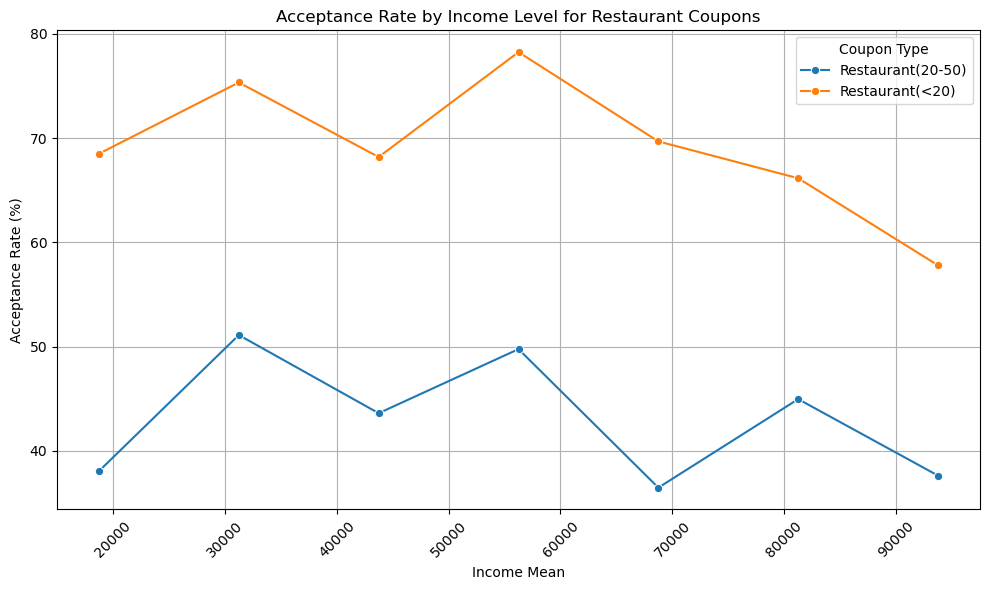

In [660]:
#Function to convert income range to mean value
def convert_income_to_mean(income_str):
    if pd.isna(income_str):
        return None
    try:
        # Remove $ and commas, split by '-'
        bounds = income_str.replace('$', '').replace(',', '').split('-')
        lower = int(bounds[0].strip())
        upper = int(bounds[1].strip())
        # Calculate mean of the range
        return (lower + upper) / 2
    except:
        return None




#do a line graph of income to cheap restaurants and income to expensive restaurants
#make a new column for income that is the median of the 2 ranges of the string
cleaned_data['income_mean'] = cleaned_data['income'].apply(convert_income_to_mean)
relevant_coupons = ['Restaurant(<20)', 'Restaurant(20-50)']
filtered_data = cleaned_data[cleaned_data['coupon'].isin(relevant_coupons)]

# Step 2: Calculate Acceptance Rates by Income Mean
# Group by 'income_mean' and 'coupon', calculate acceptance rate
acceptance_rates = filtered_data.groupby(['income_mean', 'coupon'])['Y'].mean().reset_index()

# Convert acceptance rate to percentage
acceptance_rates['acceptance_rate'] = acceptance_rates['Y'] * 100

# Step 3: Plot using Seaborn Lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=acceptance_rates, x='income_mean', y='acceptance_rate', hue='coupon', marker='o')

# Plot aesthetics
plt.title('Acceptance Rate by Income Level for Restaurant Coupons')
plt.xlabel('Income Mean')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Coupon Type')
plt.grid(True)
plt.tight_layout()
plt.show()


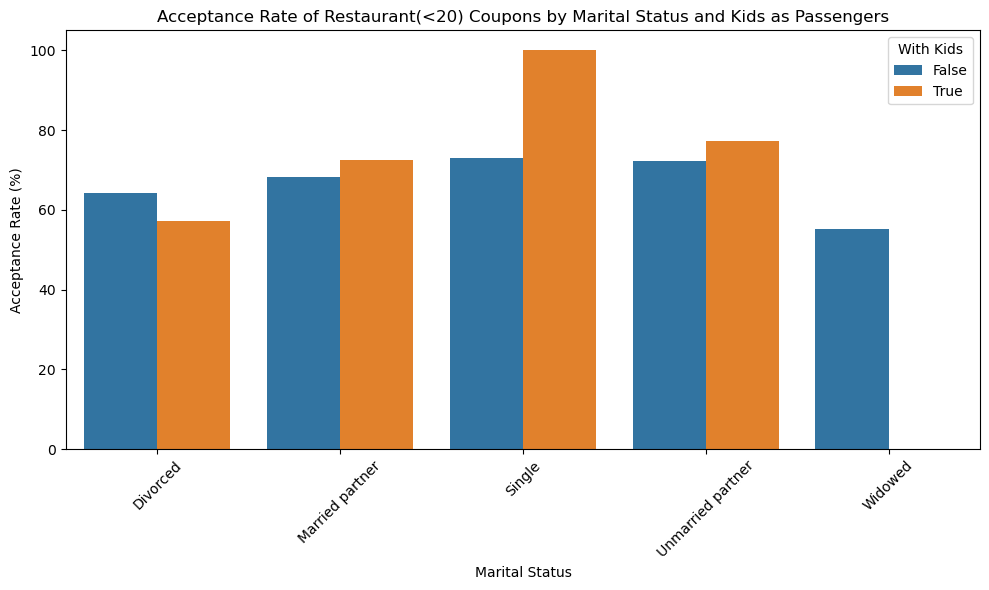

In [661]:
#now compare marital status and kids as passengers to accpetance of restaurants less than 20
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for 'Restaurant(<20)' Coupons
restaurant_cheap = cleaned_data[cleaned_data['coupon'] == 'Restaurant(<20)'].copy()

# Step 2: Create a 'with_kids' Column (True/False based on 'passenger')
restaurant_cheap['with_kids'] = restaurant_cheap['passenger'].str.contains('kid', case=False, na=False)

# Step 3: Group by 'maritalStatus' and 'with_kids', Calculate Acceptance Rate
acceptance_rates = restaurant_cheap.groupby(['maritalStatus', 'with_kids'])['Y'].mean().reset_index()

# Convert acceptance rate to percentage
acceptance_rates['acceptance_rate'] = acceptance_rates['Y'] * 100

# Step 4: Visualize Using Seaborn Barplot
plt.figure(figsize=(10,6))
sns.barplot(data=acceptance_rates, x='maritalStatus', y='acceptance_rate', hue='with_kids')

# Plot aesthetics
plt.title('Acceptance Rate of Restaurant(<20) Coupons by Marital Status and Kids as Passengers')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate (%)')
plt.legend(title='With Kids')
plt.xticks(rotation=45)
plt.tight_layout()
#also compare education and acceptance rate for both cheap and expensive restaurants 

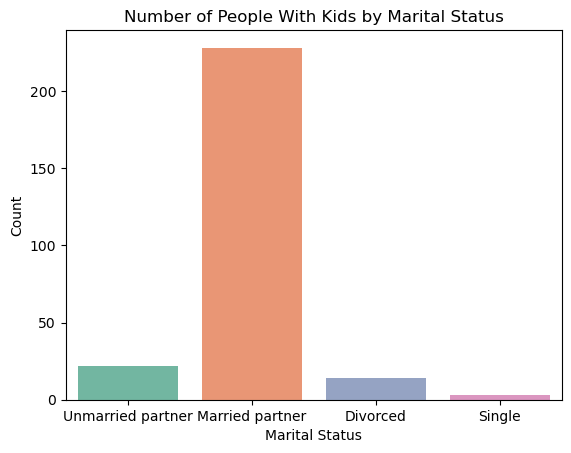

In [662]:
marital_status_with_kids = restaurant_cheap.groupby(['maritalStatus', 'with_kids']).count()
#print (marital_status_with_kids)
with_kids_data = restaurant_cheap[restaurant_cheap['with_kids'] == True]

# Plot using countplot
sns.countplot(data=with_kids_data, x='maritalStatus', hue='maritalStatus', palette='Set2')

# Aesthetics
plt.title("Number of People With Kids by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


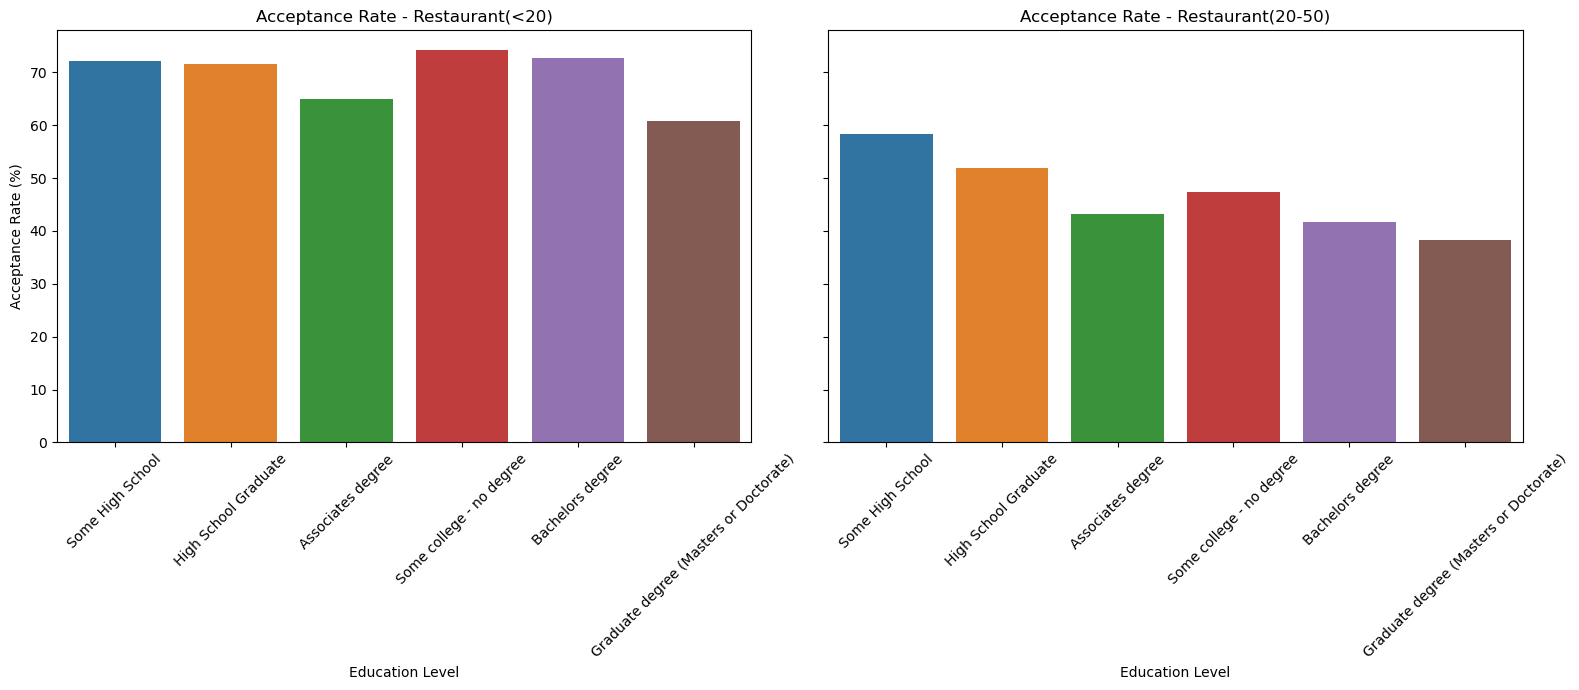

In [751]:
# Step 1: Filter for "Restaurant(<20)" and "Restaurant(20-50)" coupons
restaurant_less_20 = cleaned_data[cleaned_data['coupon'] == 'Restaurant(<20)']
restaurant_20_50 = cleaned_data[cleaned_data['coupon'] == 'Restaurant(20-50)']

# Function to calculate acceptance rates
def calculate_acceptance(data):
    acceptance = data.groupby('education')['Y'].agg(
        total_coupons='count',
        accepted_coupons=lambda x: (x == 1).sum()
    ).reset_index()
    acceptance['acceptance_rate'] = round(
        (acceptance['accepted_coupons'] / acceptance['total_coupons']) * 100, 2
    )
    return acceptance

# Calculate acceptance rates
acceptance_less_20 = calculate_acceptance(restaurant_less_20)
acceptance_20_50 = calculate_acceptance(restaurant_20_50)

# Education order for consistent plotting
education_order = [
    'Some High School',  
    'High School Graduate',  
    'Associates degree',   
    'Some college - no degree',  
    'Bachelors degree',   
    'Graduate degree (Masters or Doctorate)'
]

# Ensure consistent order
for df in [acceptance_less_20, acceptance_20_50]:
    df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
    df.sort_values('education', inplace=True)

# Step 2: Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Plot for Restaurant(<20)
sns.barplot(data=acceptance_less_20, x='education', y='acceptance_rate', ax=axes[0], hue="education")
axes[0].set_title('Acceptance Rate - Restaurant(<20)')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Acceptance Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Restaurant(20-50)
sns.barplot(data=acceptance_20_50, x='education', y='acceptance_rate', ax=axes[1], hue="education")
axes[1].set_title('Acceptance Rate - Restaurant(20-50)')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Acceptance Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

# Plot aesthetics
plt.tight_layout()
plt.show()

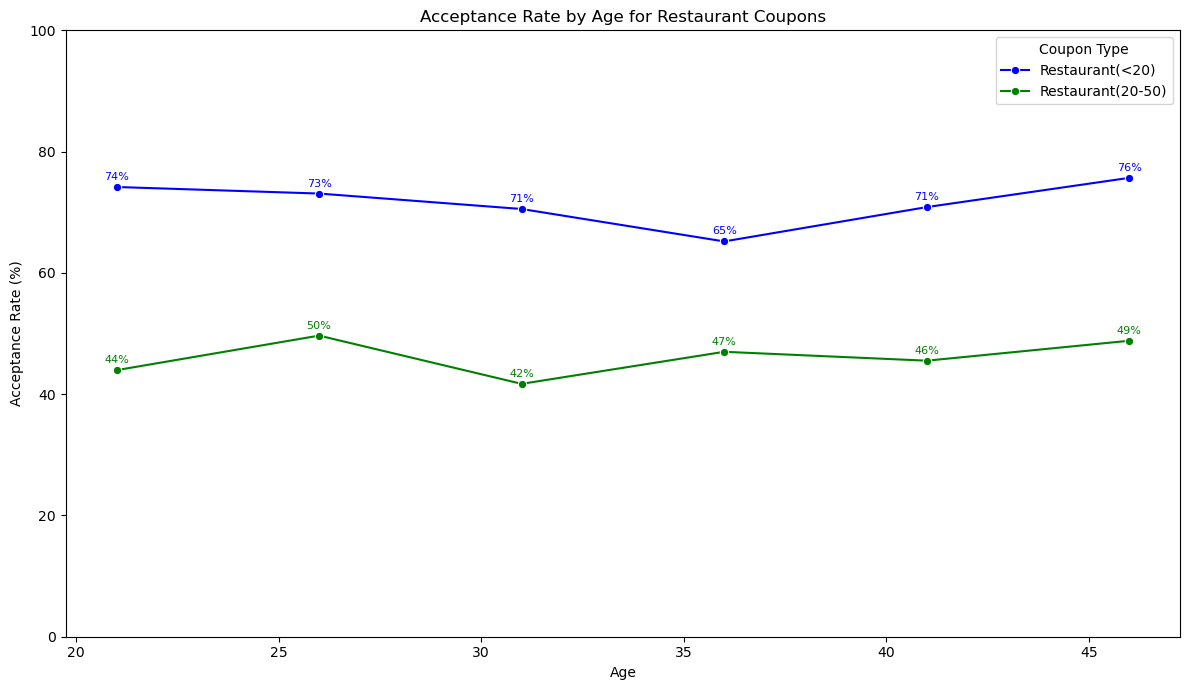

In [765]:
# Step 1: Filter Data for Relevant Coupons
relevant_coupons = ['Restaurant(<20)', 'Restaurant(20-50)']
filtered_data = cleaned_data[cleaned_data['coupon'].isin(relevant_coupons)]

# Step 2: Create a Single Plot
plt.figure(figsize=(12, 7))

# Color mapping for coupon types
color_map = {
    'Restaurant(<20)': 'blue',
    'Restaurant(20-50)': 'green'
}

# Step 3: Plot Acceptance Rates for Both Coupons
for coupon_type in relevant_coupons:
    # Filter for specific coupon type
    coupon_data = filtered_data[filtered_data['coupon'] == coupon_type]

    # Aggregate data by age and acceptance status
    age_acceptance = coupon_data.groupby(['age', 'Y']).size().reset_index(name='count')

    # Calculate total coupons per age
    total_per_age = age_acceptance.groupby('age')['count'].sum().reset_index(name='total_count')

    # Merge to get total counts alongside acceptance data
    age_acceptance = age_acceptance.merge(total_per_age, on='age')

    # Calculate acceptance percentage
    age_acceptance['acceptance_percentage'] = (age_acceptance.apply(
        lambda row: (row['count'] / row['total_count']) * 100 if row['Y'] == 1 else None, axis=1))

    # Drop rows with None in acceptance_percentage (to only plot accepted percentages)
    accepted_data = age_acceptance.dropna(subset=['acceptance_percentage'])

    # Plot line graph for acceptance percentage
    sns.lineplot(
        data=accepted_data, 
        x='age', 
        y='acceptance_percentage', 
        marker='o', 
        color=color_map[coupon_type], 
        label=coupon_type
    )

    # Annotate Data Points with Percentages
    for x, y in zip(accepted_data['age'], accepted_data['acceptance_percentage']):
        plt.annotate(f'{int(round(y, 0))}%', xy=(x, y), textcoords="offset points", xytext=(0, 5), 
                     ha='center', fontsize=8, color=color_map[coupon_type])

# Step 4: Set Plot Titles and Labels
plt.title('Acceptance Rate by Age for Restaurant Coupons')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.legend(title='Coupon Type')
plt.tight_layout()

# Display the Plot
plt.show()